In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

## usamos aqui o Sequential, e o Dense mas nao vamos nos preocupar com eles agora
## usamos tbm o Dataset mnist que vamos usar para testes
## Usamos o matplotlib para ver o digito que estamos trabalhando

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
## O que o shape mostra é que temos 60000 imagens nesse dataset com imagens de 28x28 
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [9]:
y_train[:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

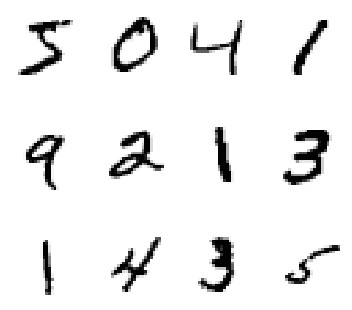

In [11]:
## o que temos de fato são as imagens própriamente ditas e depois o que elas refresentam um número
## o que esse código está fazendo é dar o print dos primeiros 12 números que printamos no array acima -> y_train[:12]
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3,4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
X_valid.shape

(10000, 28, 28)

In [14]:
y_valid.shape

(10000,)

In [15]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

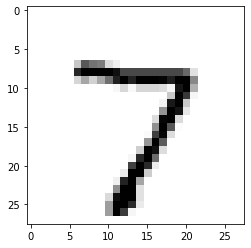

In [16]:
plt.imshow(X_valid[0], cmap='Greys')

In [21]:
## Reshape - transoformando 2 dimensões de imagem para uma só
## conversão dos valores que até então eram inteiros para uma precisão de float

X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')



In [22]:
X_valid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
X_train /= 255
X_valid /= 255

In [25]:
## Convert to one hot encoding
## Temos 10 possíveis digitos escritos a mão n_classes = 10

n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)


In [32]:
'''/*
AO invés de representar o número 7 que é o primeiro digito com um inteiro = 7 , temos um array de 10 posições que consiste quase que
inteiramente de 0`s com exessão apenas de um "1" na oitava posição. . Nessa codificação de one hot encoding temos essa representação.

Seguiindo dessa forma, para 10 possibilidades que temos, o número 0 seria represnetado com 1 na primeira posição e o resto = 0
1 = 0 na primeira posição e 1 na segunda posição e assim por diante

Dessa forma elas ficaram aninhadas com base em que nossa rede neural artifical consiga prever 10 probabilidades diferentes]

Dessa forma produziria a probabilidade 1 para o que é um sete e probabilidade 0 para qualquer um dos outros 9 digitos



*/'''

y_valid

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)



## Projetando a arquiterura de Rede Neural

In [35]:
## Aqui vamos arquitetar nossa própria rede neural artifical.
## Existem infinitas possibilidades aqui e a medida que vamos avançando no livro vamos coneçar 
## a desenvolver uma intuição que orienta a seleção das arquiteturas com as quais podemos 
## experimenar para resolver um determinado problema


model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))




In [36]:
#Na primeira linha de código acima, iniciamos o tipo mais simples de Neural Network Model Object
# Na segunda linha de código, usamos o add() metodo para o nosso modelo, para especificar os atributos do nosso hidden layer
#(64) signmoid de neurônios artificais é um general propose
# E temos o input de 784 valores para cada imagem

# Na terceira linha, temos usamos o metodo add no modelo novamente para especificar o output layer 
# com os seus parâmetros, como por exemplo os 10 neuônios representando as nossas 10 diferentes possibilides
# sofmax representando as probabilidades



## Training a Deep Learning Model

In [50]:
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(X_train, y_train,
          batch_size=128, epochs=200,
          verbose=1,
          validation_data=(X_valid, y_valid))


Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 9s 149us/step - loss: 0.0896 - val_loss: 0.0890
Epoch 2/200
60000/60000 [==============================] - 6s 103us/step - loss: 0.0884 - val_loss: 0.0875
Epoch 3/200
60000/60000 [==============================] - 6s 100us/step - loss: 0.0862 - val_loss: 0.0845
Epoch 4/200
60000/60000 [==============================] - 6s 100us/step - loss: 0.0822 - val_loss: 0.0793
Epoch 5/200
60000/60000 [==============================] - 5s 91us/step - loss: 0.0762 - val_loss: 0.0725
Epoch 6/200
60000/60000 [==============================] - 6s 98us/step - loss: 0.0691 - val_loss: 0.0652
Epoch 7/200
60000/60000 [==============================] - 5s 90us/step - loss: 0.0619 - val_loss: 0.0580
Epoch 8/200
60000/60000 [==============================] - 7s 111us/step - loss: 0.0552 - val_loss: 0.0517
Epoch 9/200
60000/60000 [==============================] - 6s 94us/step - loss: 0.0494 - val_los

60000/60000 [==============================] - 6s 106us/step - loss: 0.0128 - val_loss: 0.0124
Epoch 75/200
60000/60000 [==============================] - 6s 106us/step - loss: 0.0127 - val_loss: 0.0124: 0s -
Epoch 76/200
60000/60000 [==============================] - 6s 104us/step - loss: 0.0127 - val_loss: 0.0123
Epoch 77/200
60000/60000 [==============================] - 7s 112us/step - loss: 0.0126 - val_loss: 0.0123
Epoch 78/200
60000/60000 [==============================] - 10s 169us/step - loss: 0.0126 - val_loss: 0.0123- ETA: 2s - loss:  - ETA: 1s - loss: 0 - ETA: 1s - loss: 0 - ETA:
Epoch 79/200
60000/60000 [==============================] - 7s 109us/step - loss: 0.0126 - val_loss: 0.0122
Epoch 80/200
60000/60000 [==============================] - 7s 121us/step - loss: 0.0125 - val_loss: 0.0122
Epoch 81/200
60000/60000 [==============================] - 6s 98us/step - loss: 0.0125 - val_loss: 0.0122
Epoch 82/200
60000/60000 [==============================] - 6s 96us/step - los

Epoch 149/200
60000/60000 [==============================] - 6s 95us/step - loss: 0.0112 - val_loss: 0.0113
Epoch 150/200
60000/60000 [==============================] - 6s 97us/step - loss: 0.0112 - val_loss: 0.0112
Epoch 151/200
60000/60000 [==============================] - 7s 121us/step - loss: 0.0112 - val_loss: 0.0112TA: 0s - lo
Epoch 152/200
60000/60000 [==============================] - 7s 114us/step - loss: 0.0112 - val_loss: 0.0112TA: 2s - l - ETA: - ETA: 0
Epoch 153/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0112 - val_loss: 0.0113
Epoch 154/200
60000/60000 [==============================] - 6s 104us/step - loss: 0.0112 - val_loss: 0.0112
Epoch 155/200
60000/60000 [==============================] - 6s 96us/step - loss: 0.0112 - val_loss: 0.0112
Epoch 156/200
60000/60000 [==============================] - 7s 121us/step - loss: 0.0112 - val_loss: 0.0111s - lo - ETA: 0s - los
Epoch 157/200
60000/60000 [==============================] - 8s 135us/ste

In [ ]:
## Explicando os passos acima: 
'''
fit () -> treinamos o modelo com esse método, passando as variáveis X_train como inputs 
e y_train como os outputs desejados

Um modo de validar os dados é passando o validation_data.

Com o machine learning, para treinat o modelo várias vezes em cima dos mesmos dados 
No caso em cima das 6000 imagens, passamos o parâmetro chamado de Epoch. 
Passando no caso oEpoch como 200 ele vai passar pelas 60000 images de treino 200 vezes separadas

Verbose = 1 -> O fit erá nos trazer o status a medida que treina, como mostrado acima . 

O que podemos ver ao longo do treinamento é que as medidas de epoch vão melhorando a medida que treinam


Após a primeira época de treinamento, observamos que val_accé igual 0.1010. 14 , 15Ou seja, 10,1% das imagens do 
conjunto de dados de validação foram classificadas corretamente por nossa arquitetura superficial. Dado que existem 10 classes de dígitos manuscritos, esperamos que um processo aleatório adivinhe 10% dos dígitos corretamente por acaso, portanto esse não é um resultado impressionante. À medida que a rede continua treinando, os resultados melhoram. Após 10 épocas de treinamento, ele está 
classificando corretamente 36,5% das imagens de validação -
muito melhor do que seria esperado por acaso! E este é apenas o começo: após 200 épocas, a melhoria da rede parece estar se estabilizando, pois atinge 86% de precisão na validação. Como construímos uma arquitetura de rede neural superficial e não envolvida, isso não é muito ruim!


'''